In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.neighbors import NearestNeighbors

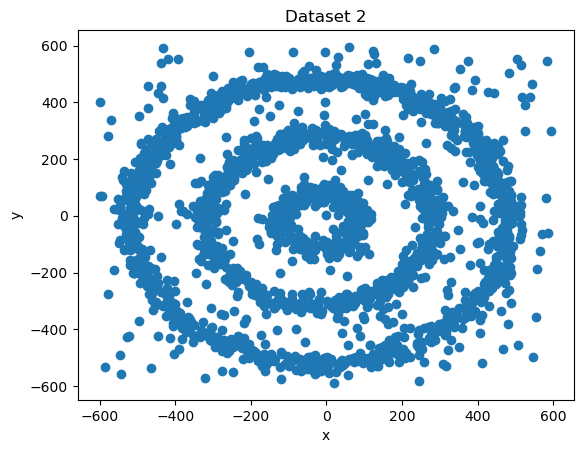

In [3]:
#visualisation of the dataset 2
dataset=np.loadtxt("train_data.csv",delimiter=",",dtype=float)
plt.scatter(dataset[:,0],dataset[:,1])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Dataset 2")
plt.show()

# Part 2a kdsitances Vs epsilon

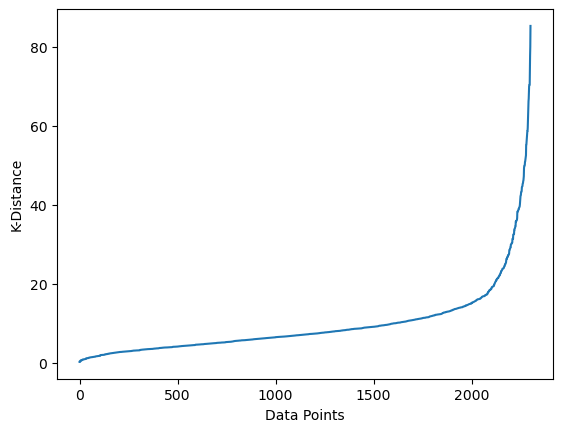

In [11]:
#using the provided code for getting the kdistances plot
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(dataset)
distances, indices = neighbors_fit.kneighbors(dataset)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlabel("Data Points")
plt.ylabel("K-Distance")
plt.plot(distances)

# Part 2b DBSCAN for dataset2

In [4]:
#function that returns points withnin eps neighbourhood of datapoint i
def neighb(i,eps):
    neighbours=[]
    #for all datapoints in the dataset check the distance is less than equal to eps and append accordingly
    for j in range(dataset.shape[0]):
        if np.linalg.norm(dataset[i]-dataset[j]) <= eps:
            neighbours.append(j)
    return neighbours

In [24]:
#dbscan implementation on a dataset "ds" with eps and minpts given
def dbscan(ds,Eps,Minpts):
    eps=Eps
    minpts=Minpts
    #visited and cluster label arrays
    visited=np.zeros(ds.shape[0],dtype=bool)
    labels=np.zeros(ds.shape[0],dtype=int)
    clusterid=0
    for i in range(ds.shape[0]):
        #if a datapoint is not visited till now then mark it visited and check for core point conditions
        if not visited[i]:
            visited[i]=True
            neighbours=neighb(i,eps)
            #if core point condition fails mark as noise for now
            if len(neighbours)< minpts:
                labels[i]=-1
            #if core point then increment the cluster id and allot it to the current datapoint
            else:
                clusterid+=1
                labels[i]=clusterid
                j=0
                #label all the neighbours with the same label
                while j<len(neighbours):
                    idx=neighbours[j]
                    #extend the neighbourhood by including the neigbhourhood of neighbours which are also core points
                    if not visited[idx]:
                        visited[idx]=True
                        new_neighbours=neighb(idx,eps)
                        if(len(new_neighbours)>=minpts):
                            neighbours=neighbours+new_neighbours
                    if labels[idx]==0:
                        labels[idx]=clusterid
                    j+=1
    #number of clusters obtained in the above 
    print("Number of clusters"+str(np.max(labels)))
    #mapping colours and labels
    cmap = plt.get_cmap('viridis', len(np.unique(labels)))

    # Plot the data with a different color for each label
    for i, label in enumerate(np.unique(labels)):
        plt.scatter(ds[labels == label, 0], ds[labels == label, 1], color=cmap(i), label=f"Label {label}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("DBSCAN Clustering for eps ="+str(eps)+" mipts="+str(minpts))
    plt.show()

Number of clusters33


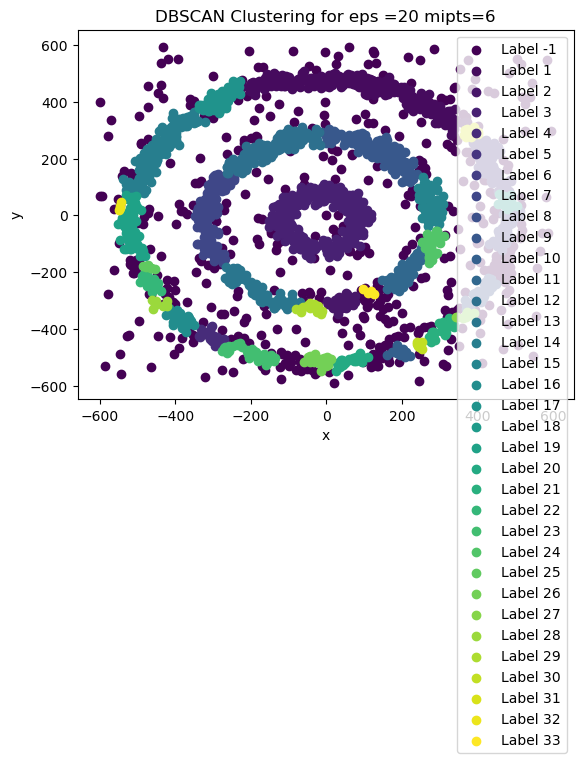

Number of clusters30


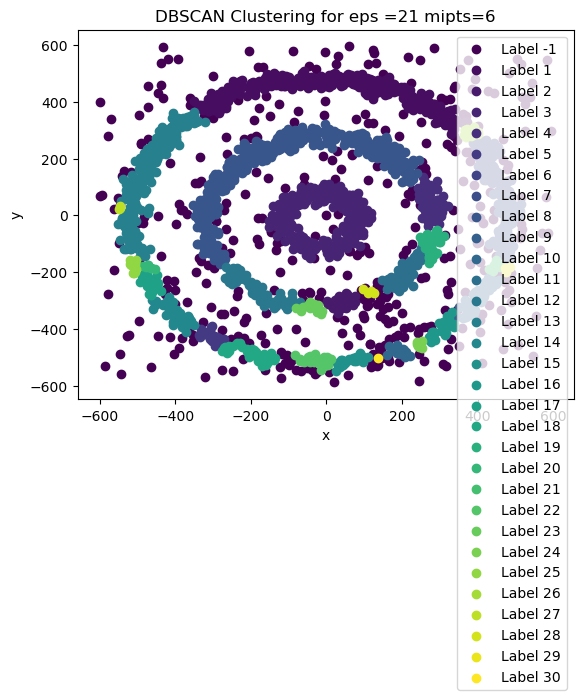

Number of clusters23


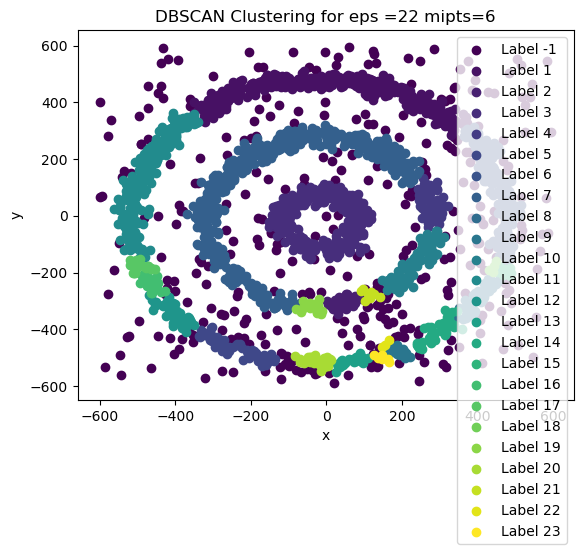

Number of clusters14


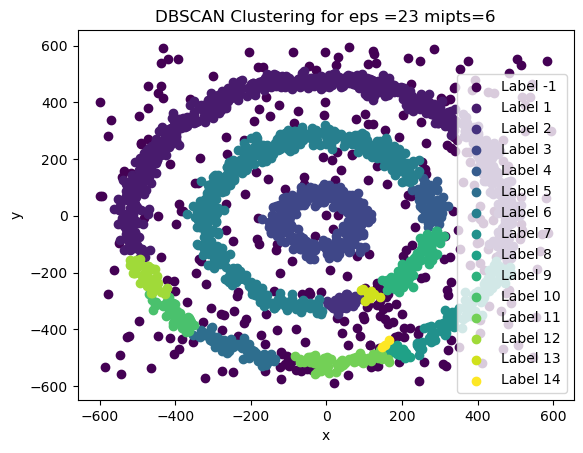

Number of clusters9


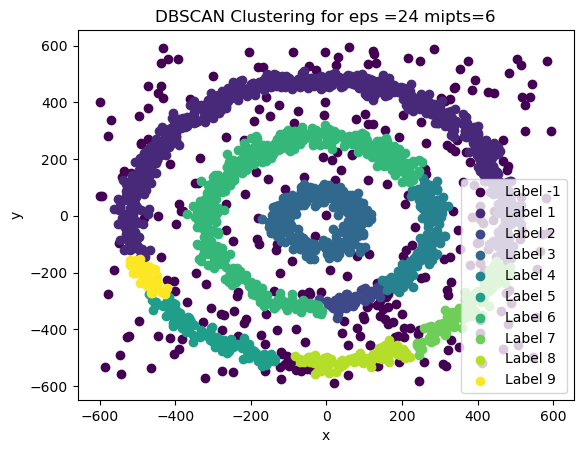

Number of clusters7


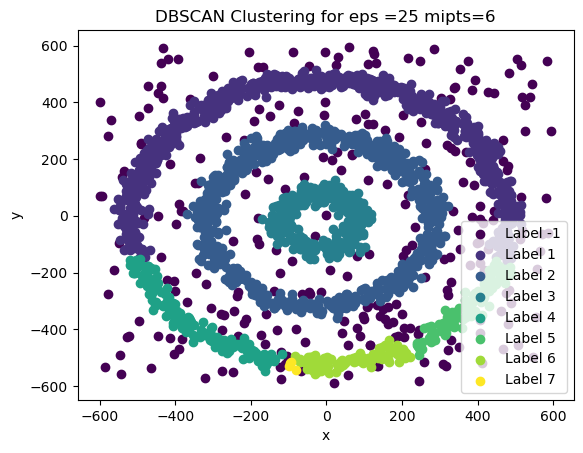

Number of clusters5


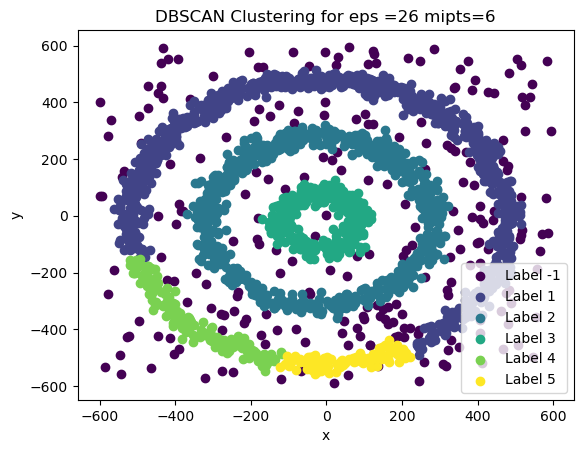

Number of clusters4


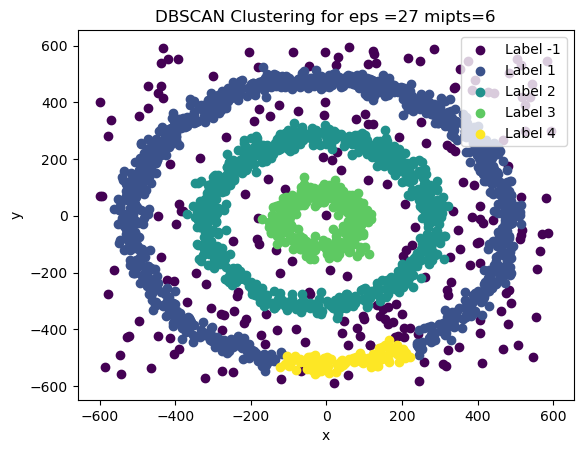

Number of clusters3


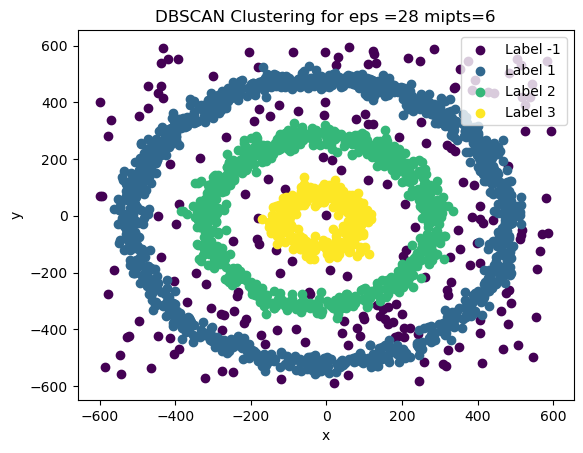

Number of clusters3


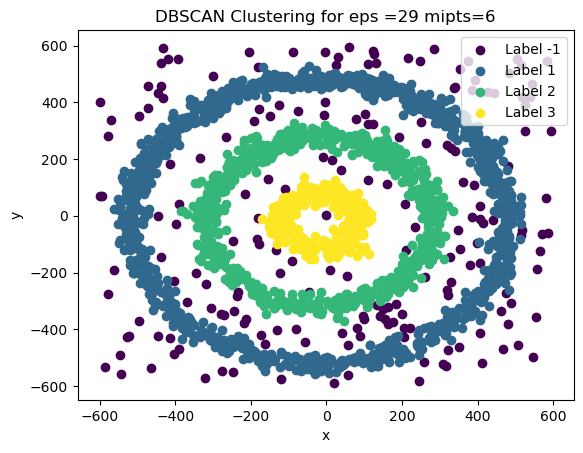

Number of clusters3


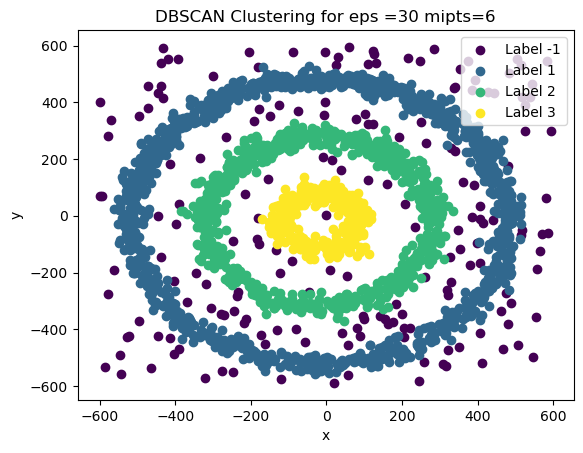

Number of clusters3


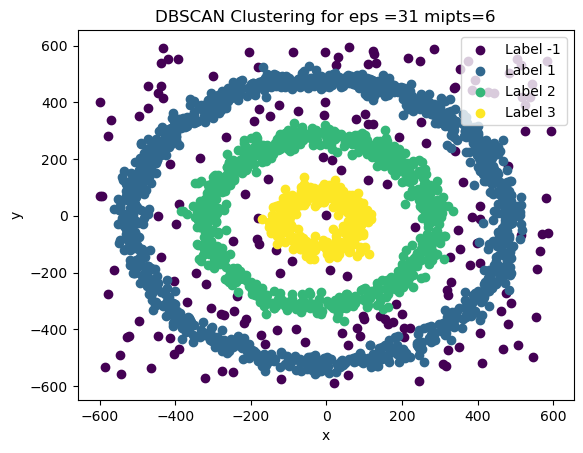

Number of clusters3


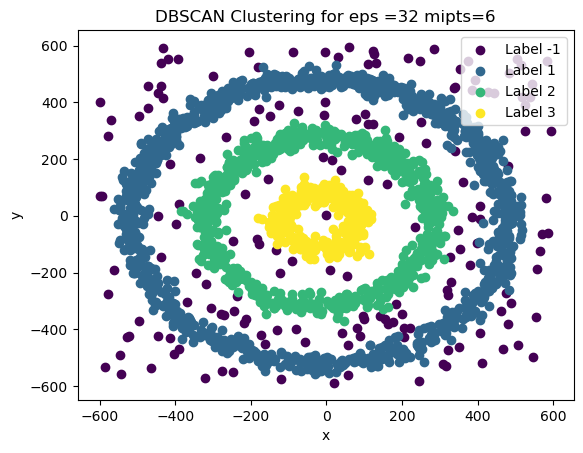

Number of clusters3


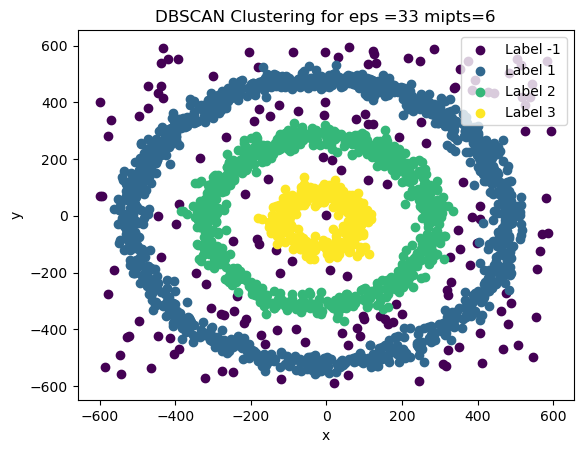

Number of clusters3


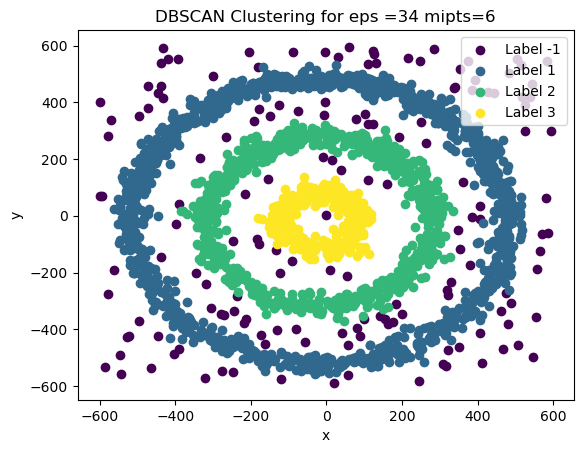

Number of clusters3


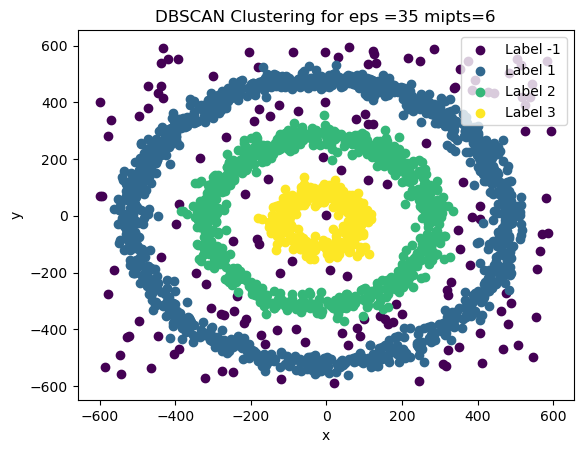

Number of clusters3


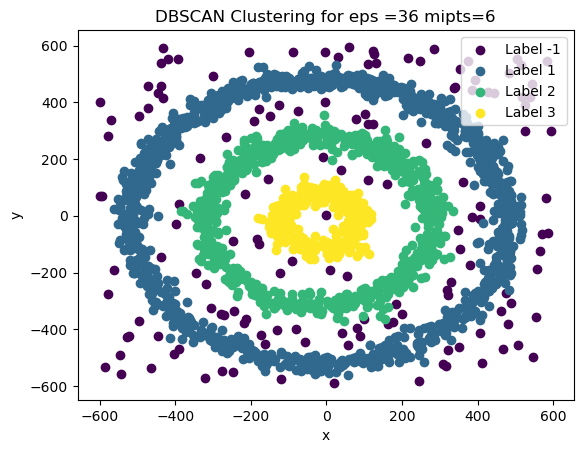

Number of clusters3


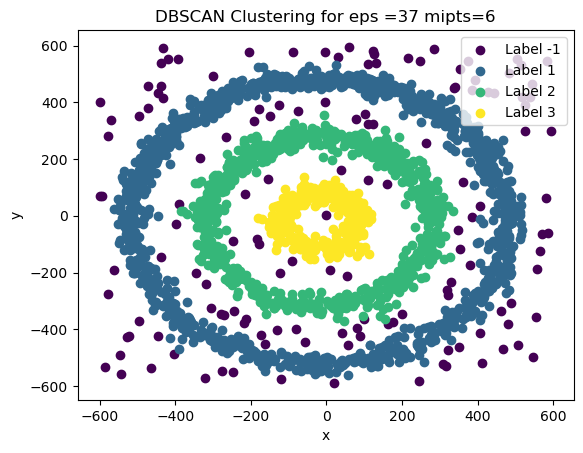

Number of clusters3


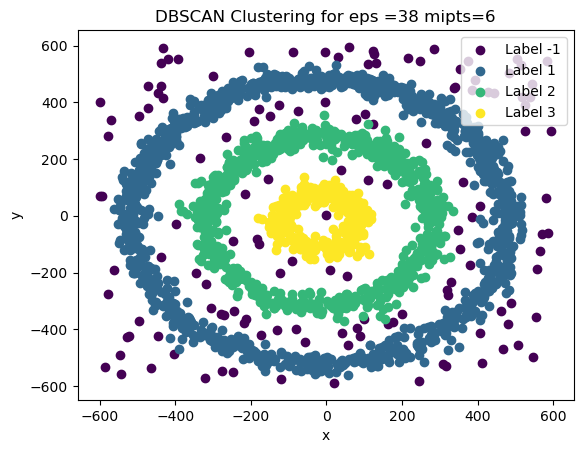

Number of clusters3


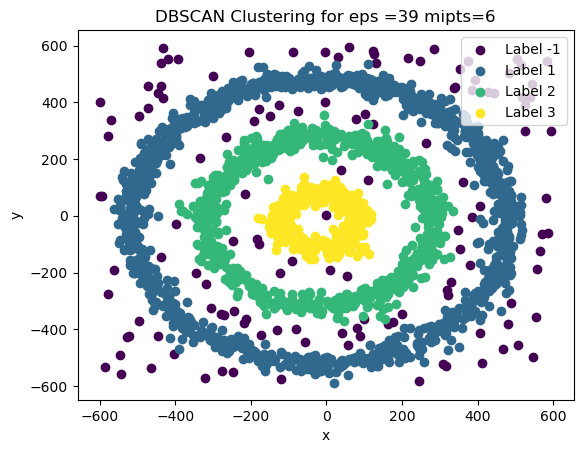

In [26]:
for i in range(20,40,1):
    dbscan(dataset,i,6)

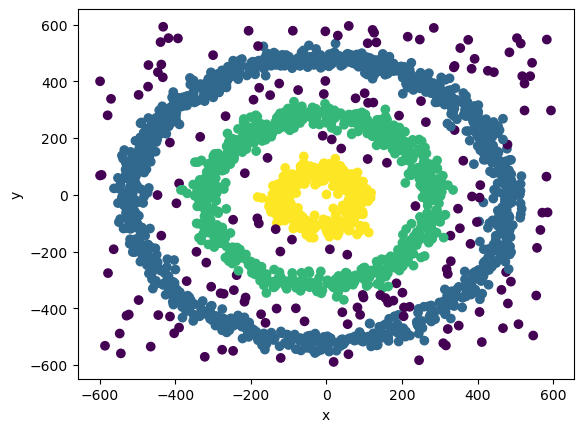

In [21]:
#comparing the replicated algorithm from scratch with the existing sklearn algorithm for dbscan
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=33,min_samples=6)
dbs.fit(dataset)
plt.scatter(dataset[:,0],dataset[:,1], c=dbs.labels_, cmap='viridis')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Part 2c Kmeans with optimal number of clusters obtained in 2b

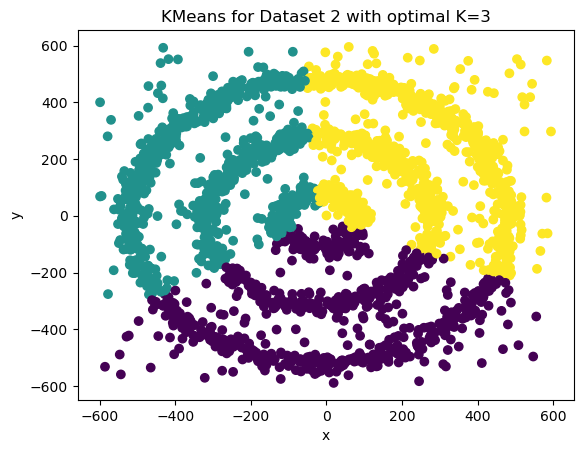

In [5]:
#KMeans with the optimal number of clusters obtained in Part 2b
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kmeans.fit(dataset)
labels = kmeans.labels_
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels)
plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans for Dataset 2 with optimal K=3")
plt.show()